In [ ]:
#importing the libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading the data

df_linear = pd.read_csv('solar_generation_selected_features.csv')

In [ ]:
#splitting the data into features and target

X = df_linear.drop('Solar Production (kWh)', axis=1)
y = df_linear['Solar Production (kWh)']

In [ ]:
# Preprocessing the data by scaling it
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Splitting the data into training, validation, and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


In [ ]:
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions on the validation set
y_val_pred = model.predict(X_val)


In [ ]:
# Evaluating the model's performance on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)  # Mean Squared Error
rmse_val = np.sqrt(mse_val)  # Root Mean Squared Error
r2_val = r2_score(y_val, y_val_pred)  # R-squared
mae_val = mean_absolute_error(y_val, y_val_pred)  # Mean Absolute Error

print(f'Validation RMSE: {rmse_val}')
print(f'Validation R^2: {r2_val}')
print(f'Validation MAE: {mae_val}')


Validation RMSE: 0.9004173033593179
Validation R^2: 0.6813418935902819
Validation MAE: 0.5956824428906917


In [ ]:
# Making predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluating the model's performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Test RMSE: {rmse_test}')
print(f'Test R^2: {r2_test}')
print(f'Test MAE: {mae_test}')

Test RMSE: 0.9656812839632092
Test R^2: 0.6623766320412663
Test MAE: 0.6314845083191126


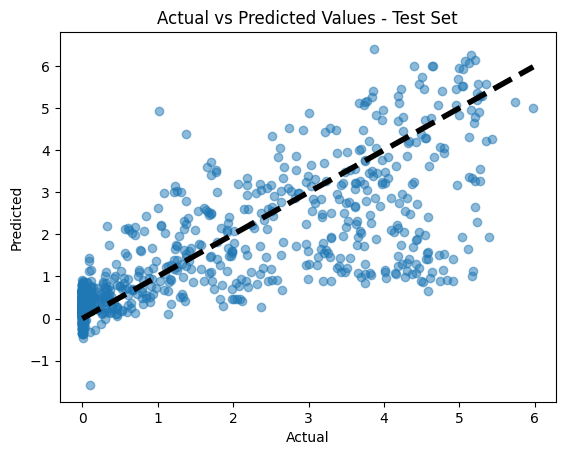

In [ ]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values - Test Set')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # This adds the 45-degree line
plt.show()

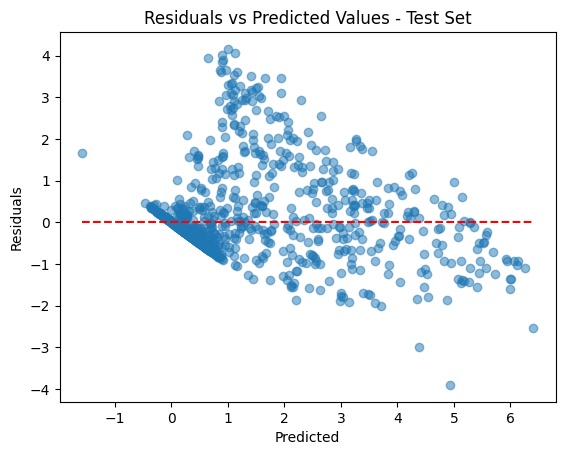

In [ ]:
# Plotting the residuals to check for patterns
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values - Test Set')
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='--')
plt.show()